In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sn
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from scipy.stats import skew, kurtosis
from scipy.signal import welch
from scipy.signal import hilbert

import json 
import pandas as pd
import numpy as np
import os
import glob

from collections import Counter
from concurrent.futures import ThreadPoolExecutor, as_completed


## Functions

In [10]:
def analyze_dataset(file_path):
    # Load dataset
    df = pd.read_csv(file_path)
    print("\n=== Basic Info ===")
    print(df.info())

    print("\n=== Statistical Summary ===")
    print(df.describe(include='all'))

    # Check for missing data
    print("\n=== Missing Values ===")
    print(df.isnull().sum())

    # Correlation matrix
    print("\n=== Correlation Matrix ===")
    print(df.corr(numeric_only=True))

    # Plot numeric columns
    numeric_cols = df.select_dtypes(include='number').columns
    if len(numeric_cols) > 0:
        df[numeric_cols].hist(figsize=(12, 8))
        plt.suptitle("Feature Distributions")
        plt.show()



=== Basic Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902766 entries, 0 to 1902765
Data columns (total 74 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   battleTime                      object 
 2   arena.id                        float64
 3   gameMode.id                     float64
 4   average.startingTrophies        float64
 5   winner.tag                      object 
 6   winner.startingTrophies         float64
 7   winner.trophyChange             float64
 8   winner.crowns                   float64
 9   winner.kingTowerHitPoints       float64
 10  winner.princessTowersHitPoints  object 
 11  winner.clan.tag                 object 
 12  winner.clan.badgeId             float64
 13  loser.tag                       object 
 14  loser.startingTrophies          float64
 15  loser.trophyChange              float64
 16  loser.crowns                    float64
 17  loser.k

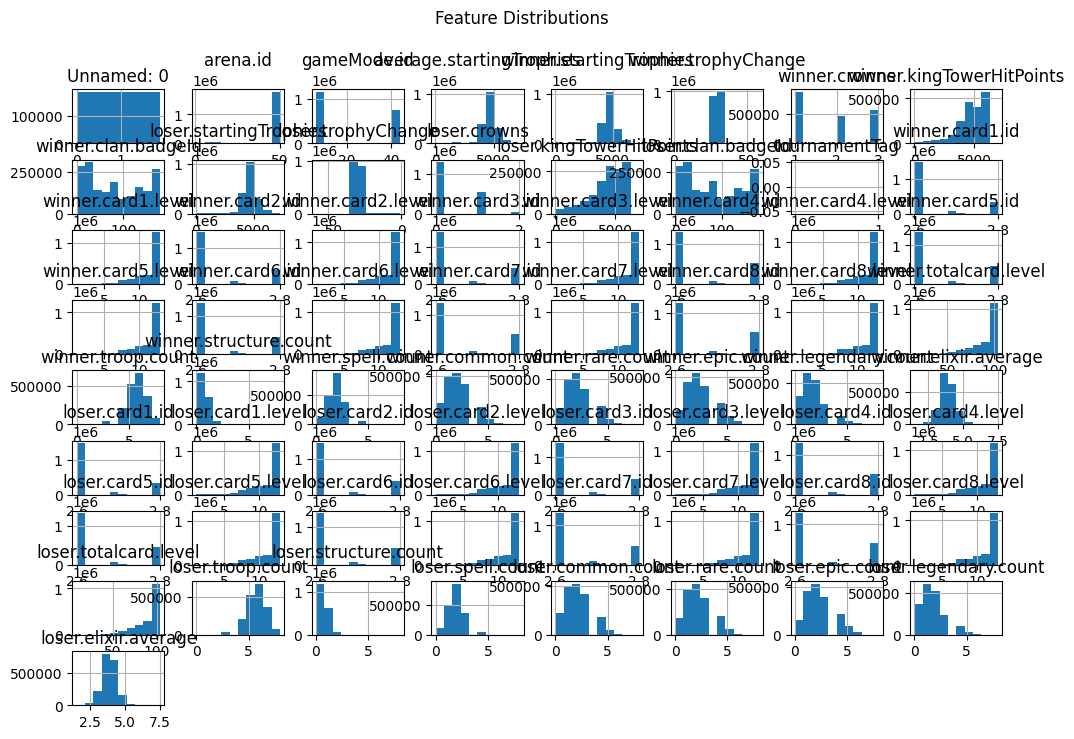

In [11]:
analyze_dataset('battle2.csv')

# df = pd.read_csv('battle2.csv')

In [7]:
print(df.head())

for col in df.columns:
    print(col)

   Unnamed: 0                 battleTime    arena.id  gameMode.id  \
0           0  2020-12-27 19:01:19+00:00  54000050.0   72000044.0   
1           1  2020-12-27 19:02:27+00:00  54000050.0   72000044.0   
2           2  2020-12-27 19:02:41+00:00  54000050.0   72000044.0   
3           3  2020-12-27 19:03:52+00:00  54000050.0   72000044.0   
4           4  2020-12-27 19:04:10+00:00  54000050.0   72000044.0   

   average.startingTrophies  winner.tag  winner.startingTrophies  \
0                    5962.0  #28JV2JQCV                   5952.0   
1                    6528.0  #2JGJG2P8U                   6532.0   
2                    5968.0   #PUGPRU2U                   5985.0   
3                    5222.0  #20YVLPP80                   5222.0   
4                    6760.0  #2RVR9GQY8                   6759.0   

   winner.trophyChange  winner.crowns  winner.kingTowerHitPoints  ...  \
0                 31.0            1.0                     5832.0  ...   
1                 29.0        

In [8]:
df = df.dropna()